In [4]:
from __future__ import unicode_literals
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile
from scipy import signal
from obspy import read
from obspy import UTCDateTime
from scipy.signal import get_window
from scipy.signal import spectrogram
from matplotlib.colors import Normalize
import sys
import os
import wave
import numpy as np
import pylab
import datetime


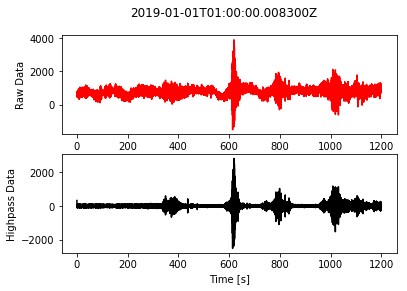

In [5]:

dt = UTCDateTime("2019-01-01T01:00:00.008300Z")
st = read('data/ABC/sac_alpha/ABC.Z.2019001.A.sac', 
          debug_headers=True, starttime=dt, endtime=dt+1200)
######################
tr = st[0]

# Filtering with a highpass on a copy of the original Trace
tr_filt = tr.copy()
tr_filt.filter('highpass', freq=5.0, corners=2, zerophase=True)

# Now let's plot the raw and filtered data...
t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)
plt.subplot(211)
plt.plot(t, tr.data, 'k', color='red')
plt.ylabel('Raw Data')
plt.subplot(212)
plt.plot(t, tr_filt.data, 'k')
plt.ylabel('Highpass Data')
plt.xlabel('Time [s]')
plt.suptitle(tr.stats.starttime)
plt.show()

In [8]:
print(len(tr.data))

120001


.ABC..Z | 2019-01-01T01:00:00.008300Z - 2019-01-01T01:10:00.008300Z | 100.0 Hz, 60001 samples


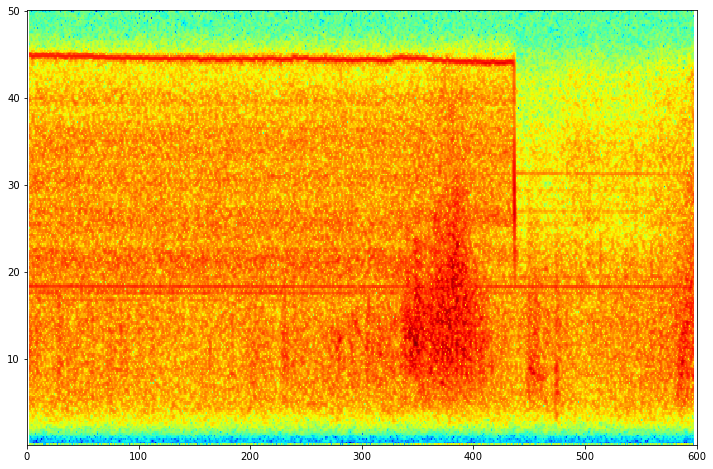

In [97]:
dt = UTCDateTime("2019-01-01T01:00:00.008300Z")
st = read('/Users/jffmllr/Desktop/data/ABC/sac_alpha/ABC.Z.2019001.A.sac', 
          debug_headers=True, starttime=dt, endtime=dt+1200)
for tr in st:
    my_sta = tr.stats.station
    my_chan = tr.stats.channel
    chan_samps = tr.stats.sampling_rate
    spec_scale = 'Log'
    my_winlen = 5.0
    my_overlap = 0.9
    idx1 = 0
    idx2 = 60 * 10
    dbscale = True
    log = False
    clip = [0.0, 1.0]
    axes = False
    cmap = 'jet'
    zorder = None
    
    tr_time = tr.stats.starttime
    tr_1 = tr.slice(tr_time+idx1,tr_time+idx2)
    tr1_filt = tr_1.filter("highpass",freq=5)
    print(tr1_filt)
    npts = tr1_filt.stats.npts
    end = npts / chan_samps
    fig, ax = plt.subplots(1,1, sharey=False, sharex = False)
    fig.set_size_inches(12,8)
    
    freq, time, specgram = spectrogram(tr1_filt.data, fs=chan_samps, 
                                       nperseg=int(my_winlen*chan_samps), 
                                       noverlap=int(my_winlen*chan_samps*my_overlap),
                                       window=get_window('hann',int(my_winlen*chan_samps)))
    if dbscale:
        specgram = 10 * np.log10(specgram[1:,:])
    else:
        specgram = np.sqrt(specgram[1:,:])
    freq = freq[1:]
    
    #vmin, vmax, = clip
    #if vmin < 0 or vmax > 1 or vmin >= vmax:
    #    msg = "invalid parameters for clip option"
        
#calc half bin width
halfbin_time = (time[1] - time[0]) / 2.0
halfbin_freq = (freq[1] - freq[0]) / 2.0

kwargs = {k: v for k, v in (('cmap', cmap),('zorder',zorder))
         if v is not None}
if log:
    freq = np.concatinate((freq,[freq[-1] + 2 * halfbin_freq]))
    time = np.concatinate((time,[time[-1] + 2 * halfbin_time]))
    time = halfbin_time
    freq = halfbin_freq
    ax.set_yscale('log')
    ax.pcolormesh(time, freq, specgram,norm=norm, **kwargs)
else:
    specgram = np.flipud(specgram)
    extent = (time[0] - halfbin_time,time[-1] + halfbin_time, freq[0] - halfbin_freq, freq[-1] + halfbin_freq)
    ax.imshow(specgram, interpolation='nearest',extent=extent, **kwargs)
ax.axis('tight')
ax.set_xlim(0,end)
ax.grid(False)
plt.show()
    

#st.spectrogram()